In [1]:
import pandas as pd
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import  KNeighborsClassifier

In [2]:
images=glob.glob('./coil/*.*') #image coil에 있는 데이터 다 가져오기 

In [3]:
images

['./coil/obj3__18.png',
 './coil/obj17__67.png',
 './coil/obj14__7.png',
 './coil/obj4__35.png',
 './coil/obj10__49.png',
 './coil/obj13__31.png',
 './coil/obj7__48.png',
 './coil/obj15__43.png',
 './coil/obj4__45.png',
 './coil/obj5__64.png',
 './coil/obj19__62.png',
 './coil/obj16__44.png',
 './coil/obj11__54.png',
 './coil/obj3__68.png',
 './coil/obj10__4.png',
 './coil/obj10__3.png',
 './coil/obj5__16.png',
 './coil/obj4__1.png',
 './coil/obj9__13.png',
 './coil/obj9__12.png',
 './coil/obj7__46.png',
 './coil/obj16__15.png',
 './coil/obj9__70.png',
 './coil/obj8__62.png',
 './coil/obj7__39.png',
 './coil/obj20__20.png',
 './coil/obj1__67.png',
 './coil/obj10__57.png',
 './coil/obj17__14.png',
 './coil/obj20__25.png',
 './coil/obj19__61.png',
 './coil/obj17__6.png',
 './coil/obj20__54.png',
 './coil/obj19__52.png',
 './coil/obj9__15.png',
 './coil/obj20__41.png',
 './coil/obj16__3.png',
 './coil/obj11__24.png',
 './coil/obj8__36.png',
 './coil/obj13__35.png',
 './coil/obj19__57.png'

In [4]:
def contructDataframe(file_list):
    data=[]
    for file in tqdm(file_list):
        data.append((file,file.split("/")[-1].split("__")[0].split("obj")[1]))
    return pd.DataFrame(data,columns=['path','label'])

In [5]:
df=contructDataframe(images)

100%|██████████| 1440/1440 [00:00<00:00, 28776.43it/s]


In [6]:
df.tail(10)

,path,label
1430,./coil/obj13__52.png,13
1431,./coil/obj14__53.png,14
1432,./coil/obj16__52.png,16
1433,./coil/obj8__4.png,8
1434,./coil/obj6__33.png,6
1435,./coil/obj4__8.png,4
1436,./coil/obj1__57.png,1
1437,./coil/obj20__3.png,20
1438,./coil/obj8__12.png,8
1439,./coil/obj8__49.png,8


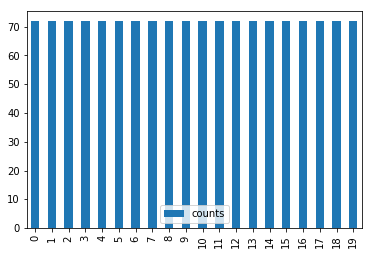

In [7]:
counts=df.groupby(df.label).size().reset_index(name="counts")
counts.plot.bar()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.path, df.label, test_size=0.5,random_state=0,stratify= df.label)

In [9]:
len(X_train)

720

In [10]:
print(y_train[df.label=='1'].count())

36


In [11]:
coil_data = np.zeros(shape=(720,4096))
i=0
for fname in X_train:
    im = pilimg.open(fname)
    img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
    res = cv2.resize(img,(64,64))
    pix = np.array(res)
    pix = np.ravel(pix, order ='C')
    coil_data[i]=pix
    i+=1

In [12]:
X_train=coil_data

In [13]:
y_train=np.array(y_train)

In [14]:
coil_dataT = np.zeros(shape=(720,4096))
i=0
for fname in X_test:
    im = pilimg.open(fname)
    img = cv2.imread(fname,cv2.IMREAD_GRAYSCALE)
    res = cv2.resize(img,(64,64))
    pix = np.array(res)
    pix = np.ravel(pix, order ='C')
    coil_dataT[i]=pix
    i+=1

In [15]:
X_test=coil_dataT

In [16]:
y_test=np.array(y_test)

In [17]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [18]:
min_max_scaler = MinMaxScaler()
X_test = min_max_scaler.fit_transform(X_test)

In [19]:
X_train.shape

(720, 4096)

In [20]:
y_test=y_test.reshape(720,1)

In [21]:
y_train=y_train.reshape(720,1)

In [22]:
y_train.shape

(720, 1)

In [23]:
#for i in range(20):
pca = decomposition.PCA()
pca.fit(X_train)
X_1= pca.transform(X_train)

In [24]:
sum=0
for i in range(200):
    sum+=pca.explained_variance_ratio_[i]
    print('PC{}: {}'.format(i+1,sum))
    if sum>0.95: break;

PC1: 0.2508051369030608
PC2: 0.3938736049708387
PC3: 0.4746203610759085
PC4: 0.5264443663970515
PC5: 0.5710089460327685
PC6: 0.6054604104893387
PC7: 0.6312946503895781
PC8: 0.6549049021310668
PC9: 0.6747584012353562
PC10: 0.6926968336818217
PC11: 0.7085496629078506
PC12: 0.7236631786848214
PC13: 0.7377237943521712
PC14: 0.7502783035602603
PC15: 0.7610968790567948
PC16: 0.7712204037757934
PC17: 0.7800480412070153
PC18: 0.7879821233926851
PC19: 0.7948616873181152
PC20: 0.8009535039416746
PC21: 0.806723972106859
PC22: 0.8121422488858024
PC23: 0.8173805543870144
PC24: 0.8224563715432054
PC25: 0.82707767618974
PC26: 0.8314711858791275
PC27: 0.8357574873097537
PC28: 0.8398809892288847
PC29: 0.8435999234163163
PC30: 0.8472112591740738
PC31: 0.850380947818784
PC32: 0.8534859101209314
PC33: 0.85652247125386
PC34: 0.8593569632015203
PC35: 0.8620908966315238
PC36: 0.8647943234392053
PC37: 0.8673531094594217
PC38: 0.8697786996800593
PC39: 0.872193861006864
PC40: 0.8745192335503856
PC41: 0.87675894

In [25]:
pca = decomposition.PCA(n_components=0.95)
pca.fit(X_train)
X_T1 = pca.transform(X_train)
X_T2 = pca.transform(X_test)

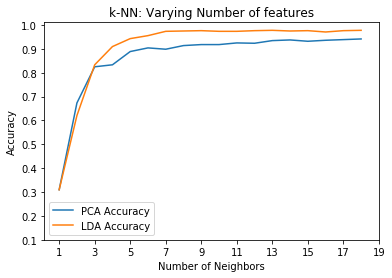

In [26]:
neighbors = np.arange(1, 19)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i in range(18):
    pca = decomposition.PCA(n_components=i+1)
    pca.fit(X_train)
    X_tr= pca.transform(X_train)
    #pca = decomposition.PCA(n_components=i+1)
    #pca.fit(X_test)
    X_te= pca.transform(X_test)
    
    lda = LinearDiscriminantAnalysis(n_components=i+1)
    lda.fit(X_T1, np.ravel(y_train))
    XTrlda = lda.transform(X_T1)
    XTeLda = lda.transform(X_T2)
    
    
    
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_tr,np.ravel(y_train))
    
    #train_accuracy[i] = knn.score(X_tr,np.ravel(y_train))
    test_accuracy[i] = knn.score(X_te, np.ravel(y_test))
    
    knn.fit(XTrlda,np.ravel(y_train))
    train_accuracy[i] = knn.score(XTeLda,np.ravel(y_test))
# Generate plot
plt.title('k-NN: Varying Number of features')
plt.plot(neighbors, test_accuracy, label = 'PCA Accuracy')
plt.plot(neighbors, train_accuracy, label = 'LDA Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,20, 2.0))
plt.yticks(np.arange(0.1,1.1, 0.1))
plt.show()